In [361]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [362]:
# !pip3  install pandas

In [363]:
train=pd.read_csv("/Users/salomonmuhirwa/Downloads/Task 1 Titanic Machine Learning from Disaster/train.csv")
test=pd.read_csv("/Users/salomonmuhirwa/Downloads/Task 1 Titanic Machine Learning from Disaster/test.csv")

In [364]:
train.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [365]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [366]:
# DAta cleaning
#check for missing values
print("Missing Values: ")
print(train.isnull().sum())



Missing Values: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [367]:
# Handling missing values in Age
train['Age'].fillna(train['Age'].median(), inplace=True)

# Handling missing values in Embarked (replace with the most frequent value)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# Handling missing values in Cabin (considering missing values as a separate category)
train['Cabin'].fillna('Unknown', inplace=True)

# Handling missing values in Fare (replace with median)
train['Fare'].fillna(train['Fare'].median(), inplace=True)

print("Missing Values after handling")
print(train.isnull().sum())






Missing Values after handling
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [368]:
# Handling missing values in Age
test['Age'].fillna(test['Age'].median(), inplace=True)

# Handling missing values in Embarked (replace with the most frequent value)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)

# Handling missing values in Cabin (considering missing values as a separate category)
test['Cabin'].fillna('Unknown', inplace=True)

# Handling missing values in Fare (replace with median)
test['Fare'].fillna(test['Fare'].median(), inplace=True)

print("Missing Values after handling in test dataset")
print(test.isnull().sum())

Missing Values after handling in test dataset
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [369]:
#feature Engineering

# Extract Titles from Name column
train['Title'] = train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
# Combine small categories in the Title column
title_counts = train['Title'].value_counts()
train['Title'] = train['Title'].apply(lambda x: 'Other' if title_counts[x] < 10 else x)

# Drop unecessary columns

train.drop(['Name', 'Ticket','Cabin','Age'], axis=1, inplace=True)

# convert categorical variables to numerical

train['Sex']=train['Sex'].map({'male':0, 'female':1})
train=pd.get_dummies(train, columns=['Embarked', 'Title'], drop_first=True)

In [370]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,1,0,3,0,1,0,7.2500,False,True,False,True,False,False
1,2,1,1,1,1,0,71.2833,False,False,False,False,True,False
2,3,1,3,1,0,0,7.9250,False,True,True,False,False,False
3,4,1,1,1,1,0,53.1000,False,True,False,False,True,False
4,5,0,3,0,0,0,8.0500,False,True,False,True,False,False


In [371]:
# Feature Engineering: Extracting titles from the 'Name' column
test['Title'] = test['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
# Combine small categories in the Title column
title_counts_test = test['Title'].value_counts()
test['Title'] = test['Title'].apply(lambda x: 'Other' if title_counts_test[x] < 10 else x)

# Drop unnecessary columns
test.drop(['Name', 'Ticket','Cabin','Age'], axis=1, inplace=True)

# Convert categorical variables to numerical
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})
test = pd.get_dummies(test, columns=['Embarked', 'Title'], drop_first=True)


# Display the DataFrame to verify the changes
print(test.head())

   PassengerId  Pclass  Sex  SibSp  Parch     Fare  Embarked_Q  Embarked_S  \
0          892       3    0      0      0   7.8292        True       False   
1          893       3    1      1      0   7.0000       False        True   
2          894       2    0      0      0   9.6875        True       False   
3          895       3    0      0      0   8.6625       False        True   
4          896       3    1      1      1  12.2875       False        True   

   Title_Miss  Title_Mr  Title_Mrs  Title_Other  
0       False      True      False        False  
1       False     False       True        False  
2       False      True      False        False  
3       False      True      False        False  
4       False     False       True        False  


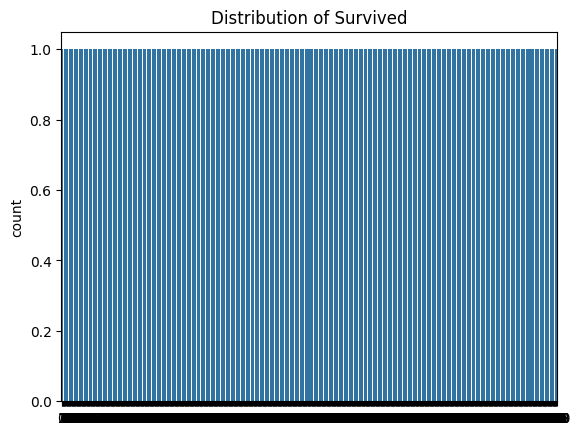

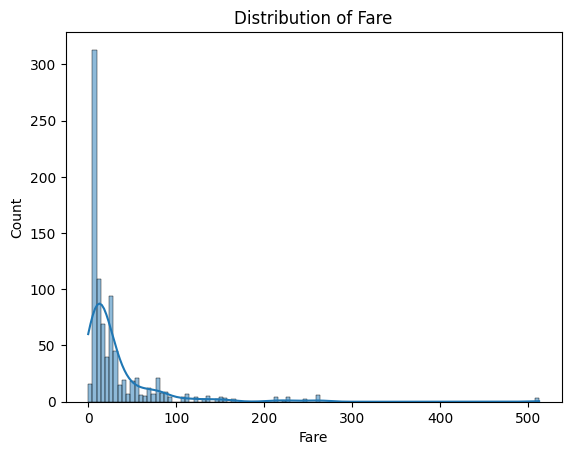

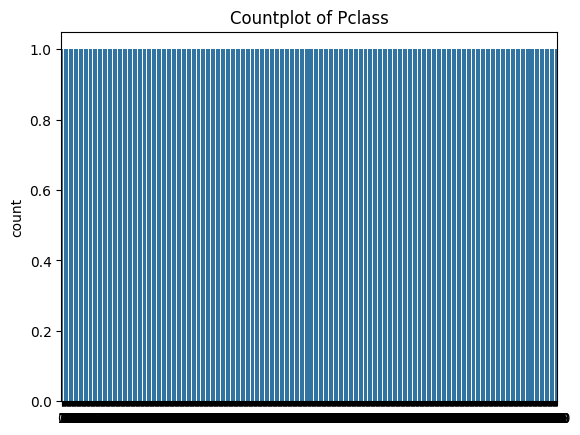

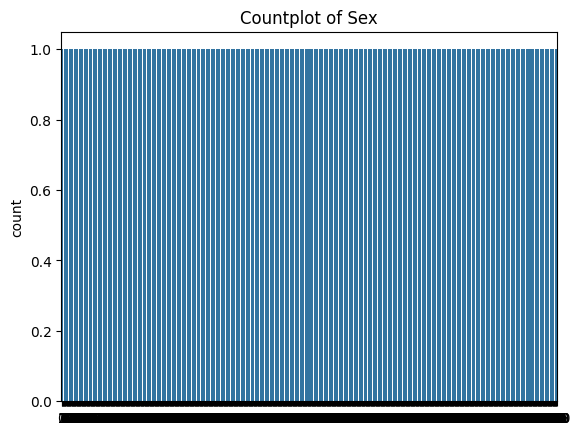

In [388]:
# Distribution of the target variable (Survived)
sns.countplot(train['Survived'])
plt.title('Distribution of Survived')
plt.show()

# # Distribution of numerical features
# sns.histplot(train['Age'], kde=True)
# plt.title('Distribution of Age')
# plt.show()

sns.histplot(train['Fare'], kde=True)
plt.title('Distribution of Fare')
plt.show()

# Countplots of categorical features
sns.countplot(train['Pclass'])
plt.title('Countplot of Pclass')
plt.show()

sns.countplot(train['Sex'])
plt.title('Countplot of Sex')
plt.show()


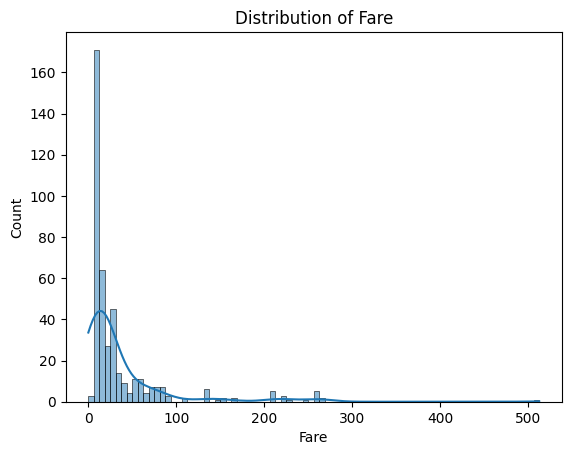

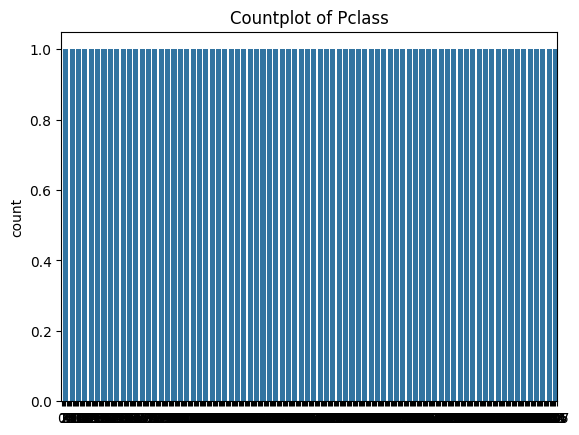

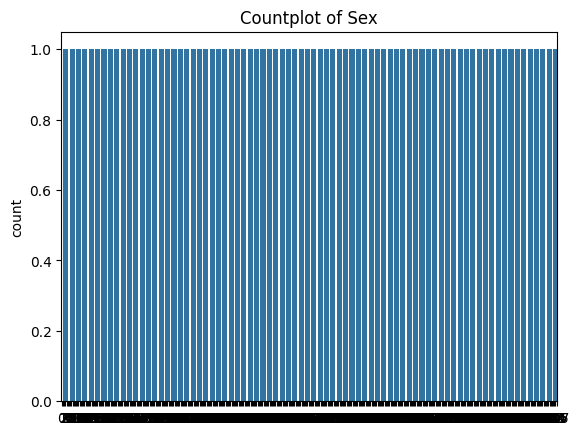

In [389]:


sns.histplot(test['Fare'], kde=True)
plt.title('Distribution of Fare')
plt.show()

# Countplots of categorical features
sns.countplot(test['Pclass'])
plt.title('Countplot of Pclass')
plt.show()

sns.countplot(test['Sex'])
plt.title('Countplot of Sex')
plt.show()


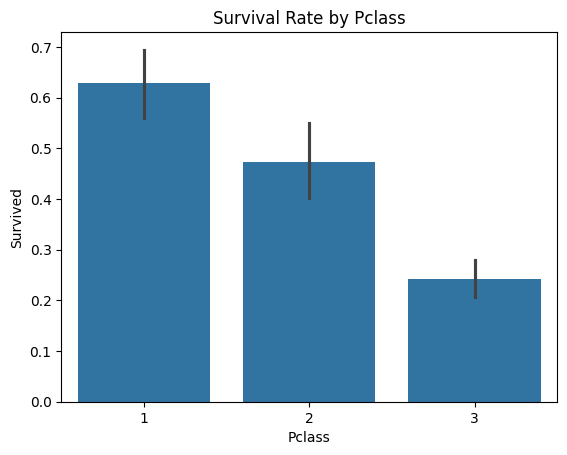

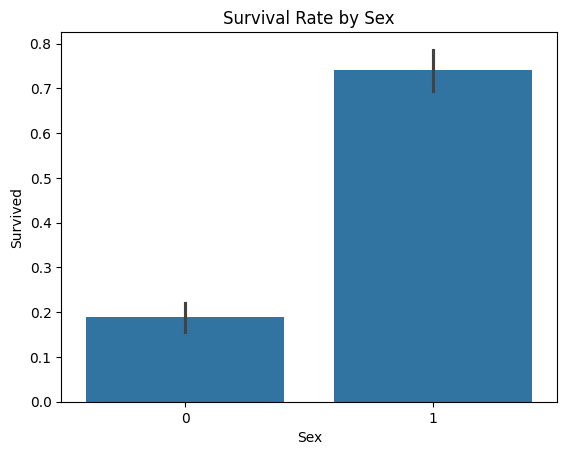

In [390]:
# Bivariate Analysis


# Survival rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=train)
plt.title('Survival Rate by Pclass')
plt.show()

# Survival rate by Sex
sns.barplot(x='Sex', y='Survived', data=train)
plt.title('Survival Rate by Sex')
plt.show()




In [391]:
# !pip3 install -U scikit-learn


In [392]:
X=train.drop('Survived', axis=1)
y=train['Survived']



In [393]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,1,0,3,0,1,0,7.2500,False,True,False,True,False,False
1,2,1,1,1,1,0,71.2833,False,False,False,False,True,False
2,3,1,3,1,0,0,7.9250,False,True,True,False,False,False
3,4,1,1,1,1,0,53.1000,False,True,False,False,True,False
4,5,0,3,0,0,0,8.0500,False,True,False,True,False,False


In [394]:
from sklearn.model_selection import train_test_split
# Train-Test Split
X = train.drop('Survived', axis=1)
y = train['Survived']
X_test = test.copy()

In [395]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,1,0,3,0,1,0,7.2500,False,True,False,True,False,False
1,2,1,1,1,1,0,71.2833,False,False,False,False,True,False
2,3,1,3,1,0,0,7.9250,False,True,True,False,False,False
3,4,1,1,1,1,0,53.1000,False,True,False,False,True,False
4,5,0,3,0,0,0,8.0500,False,True,False,True,False,False


In [396]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer



from sklearn.linear_model import LogisticRegression

In [397]:
#model=LogisticRegression(random_state=42)
model=RandomForestClassifier(random_state=42)


# Split the train dataset into features (X) and target variable (y)
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# Split the test dataset into features (X_test)
X_test = test.copy()

In [398]:
# # Model Training
# model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)




RandomForestClassifier(random_state=42)

In [399]:
# prediction on validation

y_pred_val=model.predict(X_val)

In [400]:
y_pred_val[:5]

array([1, 0, 0, 1, 0])

In [401]:
# prediction on test data
y_pred_test=model.predict(X_test)
print("Length of y_val:", len(y_val))
print("Length of y_pred_test:", len(y_pred_val))


Length of y_val: 179
Length of y_pred_test: 179


In [402]:
# Evaluate the model on the validation set
print("\nRandom Forest Accuracy on Validation Set: ", accuracy_score(y_val, y_pred_val))
print("\nRandom Forest Classification Report on Validation Set:\n", classification_report(y_val, y_pred_val))
print("\nRandom Forest Confusion Matrix on Validation Set:\n", confusion_matrix(y_val, y_pred_val))



Random Forest Accuracy on Validation Set:  0.8156424581005587

Random Forest Classification Report on Validation Set:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


Random Forest Confusion Matrix on Validation Set:
 [[89 16]
 [17 57]]


In [403]:
import pandas as pd

# Assuming y_pred_test contains the predicted labels for the test set
# Create a DataFrame with 'PassengerId' and 'Survived' columns
submission_df = pd.DataFrame({
    'PassengerId': test['PassengerId'],  # Assuming 'PassengerId' is the column name in the test set
    'Survived': y_pred_test
})

# Display the DataFrame
display(submission_df)


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
